[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/huggingface/education-toolkit/blob/main/tutorials/ES/03_Primeros_pasos_con_Transformers.ipynb)

💡 **¡Hola!**

Hemos reunido un conjunto de herramientas que tanto profesores universitarios como organizadores de eventos pueden usar para preparar fácilmente laboratorios, tareas o clases. El contenido está diseñado de manera autónoma tal que pueda ser facilmente incorporado a clases existentes. Este contenido es gratuito y usa tecnologías ampliamente conocidas de código abierto (`transformers`, `gradio`, etc).

Alternativamente, puede solicitar que un miembro del equipo de Hugging Face ejecute los tutoriales para su clase a través de la iniciativa [ML demo.cratization tour](https://huggingface2.notion.site/ML-Demo-cratization-tour-with-66847a294abd4e9785e85663f5239652).

Puede encontrar todos los tutoriales y recursos que hemos construido [aquí](https://huggingface2.notion.site/Education-Toolkit-7b4a9a9d65ee4a6eb16178ec2a4f3599). 

# Tutorial: Primeros pasos con Transformers

**Objetivos de aprendizaje:** El objetivo de este tutorial es aprender cómo:

1. Las redes neuronales Transformer pueden ser usadas para hacer frente a un amplio rango de tareas en el procesamiento del lenguaje natural y más.
2. El aprendizaje por transferencia permite adaptar Transformers a tareas específicas.
3. La función `pipeline()` de la biblioteca `Transformers` puede ser usada para correr inferencias con modelos desde el [Hub de Hugging Face](https://huggingface.co/models).

Este tutorial está basado en nuestro primer libro publicado por O'Really [_Natural Language Processing with Transformers_](https://transformersbook.com/) - ¡Dale un vistazo si quieres ahondar en este tema!
**Duración**: 30-45 minutos.

**Pre-requisitos:** Conocimiento de Python y estar familiarizado con Machine Learning.


**Autor**: [Lewis Tunstall](https://twitter.com/_lewtun) (Siéntete libre de contactarme si tienes alguna pregunta acerca de este tutorial)

¡Todos estos pasos se pueden completar de manera gratuita! Todo lo que necesitas es un navegador y un lugar para escribir en Python 👩‍💻

## 0. ¿Por qué Transformers?

El aprendizaje profundo (Machine Learning) actualmente está bajo un periodo de rápido progreso en una amplia gama de aplicaciones incluyendo:

* 📖 Procesamiento del lenguaje natural
* 👀 Visión por computadora
* 🔊 Audio
* 🧬 Biología
* y mucho más!

El principal autor de estos avances es el **Transformer** -- una novedosa **red neuronal** desarrollada por investigadores de Google en 2017. En conclusión, si estás dentro del Machine Learning, necesitas Transformers.

Acá presentamos ejemplos de lo que los Transformers pueden hacer:

* 💻 Pueden **generar código** en productos como [GitHub Copilot](https://copilot.github.com/), el cual está basado en la familia de [GPT models](https://huggingface.co/gpt2?text=My+name+is+Clara+and+I+am) de OpenAI.
* ❓ Pueden ser usados para el **mejoramiento de motores de búsqueda** como hizo [Google](https://www.blog.google/products/search/search-language-understanding-bert/) con un Transformer llamado [BERT](https://huggingface.co/bert-base-uncased).
* 🗣️ Pueden **procesar el habla en múltiples lenguajes** para realizar reconocimiento de voz, traducciones e identificación del lenguaje. Por ejemplo, el módulo de Facebook [XLS-R](https://huggingface.co/spaces/facebook/XLS-R-2B-22-16) puede transcribir audio de manera automática de un lenguaje a otro.

Entrenar estos modelos **desde el inicio** involucra **muchos recursos**. Se requiere de una gran cantidad de computación, datos y días para entrenarlos. 😱

Afortunadamente, no se requiere realizar el entrenamiento en la mayoría de casos. Gracias a una técnica conocida como **transferencia de aprendizaje** (transfer learning en inglés) es posible adaptar un modelo que ha sido entrenado desde cero (usualmente llamado **modelo pre-entrenado**) a una variedad de tareas subsecuentes. Este proceso es llamado **fine-tuning** y generalmente puede ser llevado a cabo con una sola GPU y un dataset de un tamaño tal que puede ser encontrado en su universidad o compañía.

Los modelos que veremos en este tutorial son todos ejemplos de modelos fine-tuned. Aprende más sobre el proceso de aprendizaje por transferencia en el siguiente video:

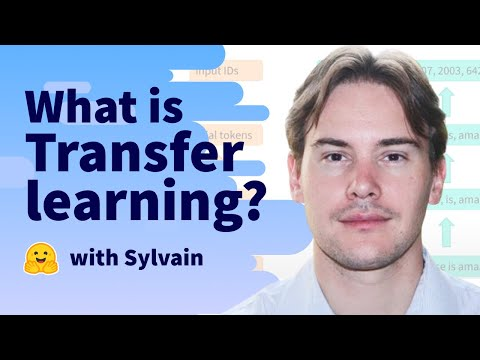

In [ ]:
from IPython.display import YouTubeVideo

YouTubeVideo('BqqfQnyjmgg')

Los Transformers son los chicos buena onda del barrio pero ¿cómo podemos usarlos? Si tan solo hubiese una biblioteca que pudiera ayudarnos ... ¡Oh espera, ahí está! La [biblioteca Transformers de Hugging Face](https://github.com/huggingface/transformers) provee una API unificada con docenas de arquitecturas Transformer, así como los medios para entrenar modelos y ejecutar inferencias con ellos. Así que para empezar vamos a instalar la biblioteca con el siguiente comando:

In [ ]:
%%capture
%pip install transformers[sentencepiece]

Ahora que hemos instalado la biblioteca vamos a ver algunas aplicaciones.


## 1. Pipelines para Transformers

El camino más rápido para aprender lo que la biblioteca Transformers puede hacer es mediante la función `pipeline()`. Esta función carga un modelo desde el Hub de Hugging Face y se encarga de todos los pasos de pre-procesamiento y post-procesamiento necesarios para convertir entradas en predicciones:

<img src="https://github.com/huggingface/workshops/blob/main/nlp-zurich/images/pipeline.png?raw=1" alt="Alt text that describes the graphic" title="Title text" width=800>

En las siguientes secciones veremos cómo estos pasos pueden ser combinados para diferentes aplicaciones. Si quieres aprender más sobre qué es lo que sucede detrás de cámara mira el siguiente video:

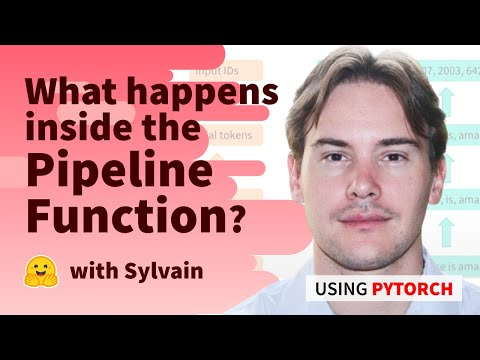

In [ ]:
YouTubeVideo('1pedAIvTWXk')

## 2. Clasificación de Texto

Comenzamos con una de las tareas más comunes en el NLP: clasificación de texto. Necesitamos un fragmento de texto para analizar en nuestros modelos; vamos a usar la siguiente retroalimentación (¡ficticia!) de un cliente sobre cierto pedido en línea:

In [ ]:
text = """Dear Amazon, last week I ordered an Optimus Prime action figure \
from your online store in Germany. Unfortunately, when I opened the package, \
I discovered to my horror that I had been sent an action figure of Megatron \
instead! As a lifelong enemy of the Decepticons, I hope you can understand my \
dilemma. To resolve the issue, I demand an exchange of Megatron for the \
Optimus Prime figure I ordered. Enclosed are copies of my records concerning \
this purchase. I expect to hear from you soon. Sincerely, Bumblebee."""

Creamos un wrapper simple para que nuestro texto quede más presentable al imprimirlo:

In [ ]:
import textwrap

wrapper = textwrap.TextWrapper(width=80, break_long_words=False, break_on_hyphens=False)
print(wrapper.fill(text))

Dear Amazon, last week I ordered an Optimus Prime action figure from your online
store in Germany. Unfortunately, when I opened the package, I discovered to my
horror that I had been sent an action figure of Megatron instead! As a lifelong
enemy of the Decepticons, I hope you can understand my dilemma. To resolve the
issue, I demand an exchange of Megatron for the Optimus Prime figure I ordered.
Enclosed are copies of my records concerning this purchase. I expect to hear
from you soon. Sincerely, Bumblebee.


Supongamos que nos gustaría predecir el sentimiento de este texto; si la retroalimentación es positiva o negativa. Este es un tipo especial de clasificación de texto que es muy usado en la industria para agregar opiniones de clientes a través de productos o servicios. El siguiente ejemplo muestra como un Transformer como BERT convierte las entradas (inputs en inglés) en partes más pequeñas llamadas tokens. Los tokens son introducidos en la red para producir una sola predicción.

<img src="https://github.com/huggingface/workshops/blob/main/nlp-zurich/images/clf_arch.png?raw=1" alt="Alt text that describes the graphic" title="Title text" width=600>

Cargar un modelo Transformer para esta tarea es bastante simple. Solo necesitamos especificar la tarea en la función `pipeline()` como se muestra a continuación:

In [ ]:
from transformers import pipeline

sentiment_pipeline = pipeline('text-classification')

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english)


Downloading:   0%|          | 0.00/629 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/255M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Cuando el código corra verás un mensaje sobre qué modelo del Hub está siendo usado por defecto. En este caso, la función `pipeline()` carga el modelo `distilbert-base-uncased-finetuned-sst-2-english`, el cual es una variante más pequeña de BERT entrenada con [SST-2](https://paperswithcode.com/sota/sentiment-analysis-on-sst-2-binary) el cual es un dataset de análisis de sentimientos.

💡 La primera vez que ejecutes el código el modelo será descargado automáticamente desde el Hub y se guardará en caché para un uso posterior.

Ahora estamos listos para correr nuestro ejemplo a través de `pipeline()` y ver algunas predicciones:

In [ ]:
sentiment_pipeline(text)

[{'label': 'NEGATIVE', 'score': 0.9015461802482605}]

El modelo predice un sentimiento negativo con una alta confianza. Tiene sentido ya que tenemos un cliente descontento. Puedes ver también que el pipeline retorna una lista de diccionarios de Python con predicciones. También podemos pasar varios textos al mismo tiempo en cuyo caso obtendríamos una lista de diccionarios para cada texto.

⚡ **¡Tu turno!** Alimenta una lista de textos con diferentes tipos de sentimiento al objeto `sentiment_pipeline`. ¿Las predicciones siempre tienen sentido?

## 3. Name Entity Recognitions (reconocimiento de entidades nombradas)

Vamos a hacer algo más sofisticado. En lugar de solo encontrar el sentimiento general, vamos a ver si podemos extraer **entidades** tales como organizaciones, lugares o individuos desde el texto. Esta tarea es llamada Name Entity Recognition o NER por su nombre corto. En vez de predecir solo una clase para todo el texto **una clase se predice por cada token**, tal como se muestra en el siguiente ejemplo:

<img src="https://github.com/huggingface/workshops/blob/main/nlp-zurich/images/ner_arch.png?raw=1" alt="Alt text that describes the graphic" title="Title text" width=600>

Nuevamente, vamos a cargar un pipeline para NER sin especificar un modelo. Esto cargará un modelo BERT que ha sido entrenado con el dataset [CoNLL-2003](https://huggingface.co/datasets/conll2003):

In [ ]:
ner_pipeline = pipeline('ner')

No model was supplied, defaulted to dbmdz/bert-large-cased-finetuned-conll03-english (https://huggingface.co/dbmdz/bert-large-cased-finetuned-conll03-english)


Downloading:   0%|          | 0.00/998 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.24G [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/60.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/208k [00:00<?, ?B/s]

Cuando pasamos nuestro texto a través del modelo obtenemos una lista larga de diccionarios de Python. Cada diccionario corresponde a una entidad detectada. Como múltiples tokens pueden corresponder a una sola entidad, podemos aplicar una estrategia de agregación que fusiona entidades si la misma clase aparece en tokens consecutivos:

In [ ]:
entities = ner_pipeline(text, aggregation_strategy="simple")
print(entities)

[{'entity_group': 'ORG', 'score': 0.8790103, 'word': 'Amazon', 'start': 5, 'end': 11}, {'entity_group': 'MISC', 'score': 0.9908588, 'word': 'Optimus Prime', 'start': 36, 'end': 49}, {'entity_group': 'LOC', 'score': 0.9997547, 'word': 'Germany', 'start': 90, 'end': 97}, {'entity_group': 'MISC', 'score': 0.5565701, 'word': 'Mega', 'start': 208, 'end': 212}, {'entity_group': 'PER', 'score': 0.59025574, 'word': '##tron', 'start': 212, 'end': 216}, {'entity_group': 'ORG', 'score': 0.6696923, 'word': 'Decept', 'start': 253, 'end': 259}, {'entity_group': 'MISC', 'score': 0.49834913, 'word': '##icons', 'start': 259, 'end': 264}, {'entity_group': 'MISC', 'score': 0.775362, 'word': 'Megatron', 'start': 350, 'end': 358}, {'entity_group': 'MISC', 'score': 0.98785394, 'word': 'Optimus Prime', 'start': 367, 'end': 380}, {'entity_group': 'PER', 'score': 0.8120961, 'word': 'Bumblebee', 'start': 502, 'end': 511}]


Esto no es muy fácil de leer así que vamos a limpiar un poco la salida:

In [ ]:
for entity in entities:
    print(f"{entity['word']}: {entity['entity_group']} ({entity['score']:.2f})")

Amazon: ORG (0.88)
Optimus Prime: MISC (0.99)
Germany: LOC (1.00)
Mega: MISC (0.56)
##tron: PER (0.59)
Decept: ORG (0.67)
##icons: MISC (0.50)
Megatron: MISC (0.78)
Optimus Prime: MISC (0.99)
Bumblebee: PER (0.81)


¡Esto es mucho mejor! Tal parece que el modelo encontró la mayoría de entidades nombradas, pero estaba confundido con "Megatron" y "Decepticons", los cuales son personajes de la franquicia de Transformers. Esto no es una sorpresa ya que el dataset original probablemente no contenía muchos personajes de Transformers. Por esta razón tiene sentido ajustar aún más el modelo en su dataset.

Ahora que hemos visto ejemplos de clasificación de texto y tokens, vamos a ver una aplicación interesante llamada **Question Answering**.

## 4. Question Answering

En esta tarea, al modelo se le da una **pregunta** y un **contexto** para así encontrar la respuesta a la pregunta dentro del contexto dado. Este problema se puede reformular como un problema de clasificación: para cada token, el modelo necesita predecir si es el comienzo o el final de la respuesta. Al final, podemos extraer la respuesta observando el lapso entre el token con la probabilidad de ser el inicio más alta y la probabilidad de ser el final más alta:

<img src="https://github.com/huggingface/workshops/blob/main/nlp-zurich/images/qa_arch.png?raw=1" alt="Alt text that describes the graphic" title="Title text" width=600>

Puedes imaginar que esto requiere un poco de pre- y post-procesamiento. Lo bueno es que el pipeline se encarga de todo eso. Como siempre, cargamos el modelo especificando la tarea en la función `pipeline()`:

In [ ]:
qa_pipeline = pipeline("question-answering")

No model was supplied, defaulted to distilbert-base-cased-distilled-squad (https://huggingface.co/distilbert-base-cased-distilled-squad)


Downloading:   0%|          | 0.00/473 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/249M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/29.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/208k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/426k [00:00<?, ?B/s]

Este modelo por defecto está entrenado con el famoso [SQuAD dataset](https://huggingface.co/datasets/squad). Vamos a ver si podemos preguntarle lo que el cliente quiere:

In [ ]:
question = "What does the customer want?"

outputs = qa_pipeline(question=question, context=text)
outputs

{'answer': 'an exchange of Megatron',
 'end': 358,
 'score': 0.6312921047210693,
 'start': 335}

Impresionante, ¡eso se ve bien!

## 5. Resumen de texto

Veamos si podemos ir más allá de estas tareas de comprensión del lenguaje natural (NLU) donde BERT sobresale, Vamos a profundizar en el dominio generativo. Tenga en cuenta que la generación es mucho más exigente desde el punto de vista computacional, ya que generalmente generamos un token a la vez y necesitamos ejecutarlo varias veces. A continuación se muestra un ejemplo de cómo funciona este proceso:

<img src="https://github.com/huggingface/workshops/blob/main/nlp-zurich/images/gen_steps.png?raw=1" alt="Alt text that describes the graphic" title="Title text" width=600>

Una tarea popular que involucra la generación es el resumen. Veamos si podemos usar un transformer para generar un resumen para nosotros:

In [ ]:
summarization_pipeline = pipeline("summarization")

No model was supplied, defaulted to sshleifer/distilbart-cnn-12-6 (https://huggingface.co/sshleifer/distilbart-cnn-12-6)


Downloading:   0%|          | 0.00/1.76k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.14G [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/878k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/446k [00:00<?, ?B/s]

Este modelo fue entrenado con: [CNN/Dailymail dataset](https://huggingface.co/datasets/cnn_dailymail) para resumir artículos de noticias.

In [ ]:
outputs = summarization_pipeline(text, max_length=45, clean_up_tokenization_spaces=True)
print(wrapper.fill(outputs[0]['summary_text']))

Your min_length=56 must be inferior than your max_length=45.


 Bumblebee ordered an Optimus Prime action figure from your online store in
Germany. Unfortunately, when I opened the package, I discovered to my horror
that I had been sent an action figure of Megatron instead.


¡No está para nada mal! Podemos ver que el modelo fue capaz de obtener la esencia principal de la retroalimentación del cliente e inclusive identificó el autor como "Bumblebee".

## 6. Traducción

¿Qué sucede si no hay modelos en el mismo idioma de mis datos? Puedes intentar traduciendo el texto. El [Helsinki NLP team](https://huggingface.co/models?pipeline_tag=translation&sort=downloads&search=Helsinkie-NLP) ha creado más de 1,000 modelos para traducciones de diferentes pares de idiomas 🤯. Acá cargamos un modelo que traduce de inglés a alemán:

In [ ]:
translator = pipeline("translation_en_to_es", model="Helsinki-NLP/opus-mt-en-es")

Downloading:   0%|          | 0.00/1.31k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/298M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/44.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/783k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/807k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.52M [00:00<?, ?B/s]

Vamos a traducir nuestro texto a alemán:

In [ ]:
outputs = translator(text, clean_up_tokenization_spaces=True, min_length=100)
print(wrapper.fill(outputs[0]['translation_text']))

Querida Amazona, la semana pasada ordené una figura de acción Optimus Prime de
su tienda en línea en Alemania. Desafortunadamente, cuando abrí el paquete,
descubrí para mi horror que me habían enviado una figura de acción de Megatron
en su lugar! Como un enemigo de toda la vida de los Decepticons, espero que
pueda entender mi dilema. Para resolver el problema, exijo un intercambio de
Megatron por la figura Optimus Prime que ordené. Adjunto son copias de mis
registros relativos a esta compra. Espero escuchar de usted pronto.
Sinceramente, Bumblebee.


Podemos observar que el texto no está perfectamente traducido pero el significado principal se mantiene. Otra aplicación interesante de modelos de traducción es el aumento de datos por medio de la retro-traducción.

## 7. Zero-shot classification

Como un último ejemplo, echemos un vistazo a una aplicación muy interesante mostrando la versatilidad de los Transformers: zero-shot classification. En zero-shot classification los modelos reciben un texto y una lista de etiquetas candidatas. Los modelos determinan qué etiquetas son compatibles con el texto. ¡En lugar de tener clases fijas se permite una clasificación flexible sin ningún dato etiquetado! Por lo general, esta es una buena primera línea de base.

In [ ]:
zero_shot_classifier = pipeline("zero-shot-classification",
                                model="vicgalle/xlm-roberta-large-xnli-anli")

Downloading:   0%|          | 0.00/734 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/2.09G [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/4.83M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/150 [00:00<?, ?B/s]

Vamos a ver un ejemplo:

In [ ]:
text = 'Dieser Tutorial ist großartig! Ich hoffe, dass jemand von Hugging Face meine Universität besuchen wird :)'
classes = ['Treffen', 'Arbeit', 'Digital', 'Reisen']

In [ ]:
zero_shot_classifier(text, classes, multi_label=True)

{'labels': ['Digital', 'Treffen', 'Arbeit', 'Reisen'],
 'scores': [0.7863984107971191,
  0.5954482555389404,
  0.44072726368904114,
  0.0017183662857860327],
 'sequence': 'Dieser Tutorial ist großartig! Ich hoffe, dass jemand von Hugging Face meine Universität besuchen wird :)'}

Parece que todo salió bien en este corto ejemplo. Naturalmente, para ejemplos más largos y concretos, esta aproximación podría no ser tan buena.

## 8. Yendo más allá del texto

Como se mencionó al principio de este tutorial, los Transformers pueden ser usados para otros dominios fuera del NLP. Para estos dominios hay muchas más pipelines con los que puedes experimentar. Mira la siguiente lista para obtener una visión general de las tareas que existen:

In [ ]:
from transformers import pipelines
for task in pipelines.SUPPORTED_TASKS:
    print(task)

audio-classification
automatic-speech-recognition
feature-extraction
text-classification
token-classification
question-answering
table-question-answering
fill-mask
summarization
translation
text2text-generation
text-generation
zero-shot-classification
conversational
image-classification
image-segmentation
object-detection


Vamos a ver una aplicación que involucre imágenes:

### Computer vision

Recientemente, los modelos Transformer también han entrado al mundo del computer vision. Revisa el modelo DETR en el [Hub](https://huggingface.co/facebook/detr-resnet-101-dc5):

<img src="https://github.com/huggingface/workshops/blob/main/nlp-zurich/images/object_detection.png?raw=1" alt="Alt text that describes the graphic" title="Title text" width=400>

### Audio

Otra área muy prometedora es el procesamiento de audio. Especialmente Speech2Text ha tenido avances muy prometedores recientemente. Mira por ejemplo el [wav2vec2 model](https://huggingface.co/facebook/wav2vec2-base-960h):

<img src="https://github.com/huggingface/workshops/blob/main/nlp-zurich/images/speech2text.png?raw=1" alt="Alt text that describes the graphic" title="Title text" width=400>

### Tabla QA

Finalmente, una gran cantidad de datos del mundo real aún siguen en forma de tablas. Poder consultar tablas es muy útil y con [TAPAS](https://huggingface.co/google/tapas-large-finetuned-wtq) puedes realizar preguntas y respuestas de manera tabular:

<img src="https://github.com/huggingface/workshops/blob/main/nlp-zurich/images/tapas.png?raw=1" alt="Alt text that describes the graphic" title="Title text" width=400>

## 9. ¿Y ahora qué?

Esperamos que este tutorial te haya dado una idea de lo que los Transformers pueden hacer y que te emocione aprender más. Acá te presentamos algunos recursos que puedes usar para profundizar en el tema así como en el ecosistema de Hugging Face.

🤗 **Un tour a través del Hub de Hugging Face**

En este tutorial llegas a:
- Explorar los más de 30,000 modelos compartidos en el Hub.
- Aprender a encontrar el modelo y datasets adecuados de manera eficiente para tus propias tareas.
- Aprender como contribuir y trabajar de manera colaborativa en tus fluhos de trabajo ML.

***Duración: 20-40 minutos***

👉 [Click acá para acceder al tutorial](https://github.com/huggingface/education-toolkit/blob/main/tutorials/ES/01_tour_hub_de_huggingface.md)

✨ **Construye y hospeda demos de Machine Learning con gradio y Hugging Face**

En este tutorial llegas a:
- Explorar ML demos creados por la comunidad.
- Construir un demo rápido para tu modelo de Machine Learning en Python usando la librería `gradio`.
- Hospedar los demos de manera gratuita con Hugging Face Spaces.
- Agregar tu demo a Hugging Face Org para tus clases o conferencias.

***Duración: 20-40 minutos***

👉 [Click aquí para acceder al tutorial](https://colab.research.google.com/github/huggingface/education-toolkit/blob/main/tutorials/ES/02_ml-demos-con-gradio.ipynb)

🎓 **Curso Hugging Face**

Este curso te enseña cómo aplicar Transformers a varias tareas en el procesamiento de lenguaje natural y demás. A lo largo del camino, aprenderás como usar el ecosistema Hugging Face — 🤗 Transformers, 🤗 Datasets, 🤗 Tokenizers, y 🤗 Accelerate — así como el Hub de. ¡Es completamente gratis!

👉 [Da click aquí para acceder al 🤗 Curso](https://huggingface.co/course/chapter1/1).